In [260]:
import scipy.io
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [263]:
train=scipy.io.loadmat("train_both_smooth.mat")
train_data=train['data']
train_targets=train['targets']
train_targets=train_targets/0.8;

test=scipy.io.loadmat("test_both_smooth.mat")
test_data=test['data']
test_targets=test['targets']
test_targets=test_targets/0.8;


# print(train_data.shape)
# print(train_targets.shape)

In [272]:
def get_new_model(input_shape):
    model=tf.keras.Sequential([
        tf.keras.layers.Dense(200, 
                              input_shape=input_shape),
        
        tf.keras.layers.Dense(500,activation='sigmoid'),
        tf.keras.layers.Dense(1000,activation='sigmoid'),
        tf.keras.layers.Dense(300),
        
    ])
    return model




In [273]:
model=get_new_model(train_data[0].shape)
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 200)               1400      
_________________________________________________________________
dense_70 (Dense)             (None, 500)               100500    
_________________________________________________________________
dense_71 (Dense)             (None, 1000)              501000    
_________________________________________________________________
dense_72 (Dense)             (None, 300)               300300    
Total params: 903,200
Trainable params: 903,200
Non-trainable params: 0
_________________________________________________________________


In [274]:
def compile_model(model):
    model.compile(optimizer='adam',loss='mse')

compile_model(model)

In [275]:
def train_model(model,train_data,train_targets,
                validation_data,epochs):
    history=model.fit(train_data,train_targets,epochs=epochs,
                     validation_data=validation_data,
                      batch_size=64,verbose=2)
    
    return history
    

In [276]:
validation_data=(test_data,test_targets)
history=train_model(model,train_data,train_targets,
                    validation_data,epochs=100)

Epoch 1/100
79/79 - 1s - loss: 0.0224 - val_loss: 0.0032
Epoch 2/100
79/79 - 0s - loss: 0.0019 - val_loss: 0.0013
Epoch 3/100
79/79 - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 4/100
79/79 - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 5/100
79/79 - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 6/100
79/79 - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 7/100
79/79 - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 8/100
79/79 - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 9/100
79/79 - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 10/100
79/79 - 0s - loss: 0.0012 - val_loss: 0.0012
Epoch 11/100
79/79 - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 12/100
79/79 - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 13/100
79/79 - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 14/100
79/79 - 0s - loss: 0.0011 - val_loss: 0.0011
Epoch 15/100
79/79 - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 16/100
79/79 - 0s - loss: 0.0011 - val_loss: 0.0012
Epoch 17/100
79/79 - 0s - loss: 0.0012 - val_loss: 0.0012
Epoch 18/100
79/79 - 0s

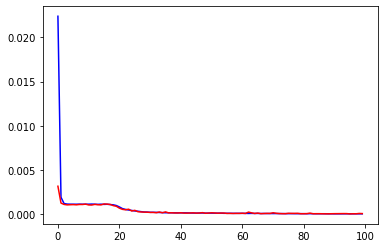

In [278]:
plt.figure
plt.plot(history.history["loss"],'b')
plt.plot(history.history["val_loss"],'r')

In [279]:
prediction=model.predict(train_data)

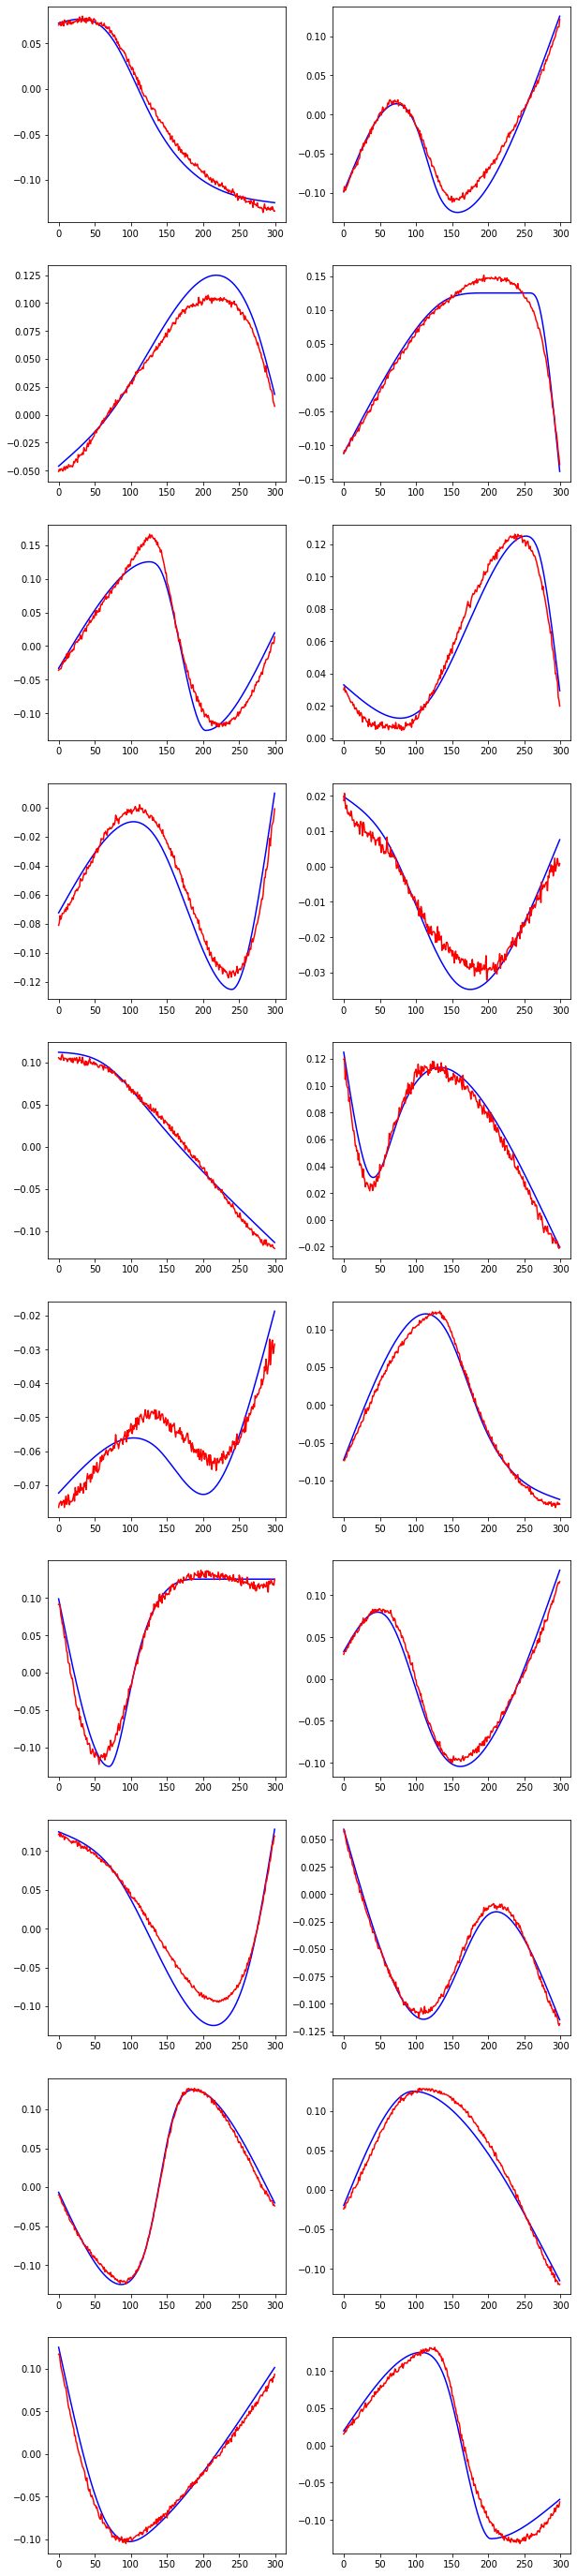

In [280]:
allfigures=20;

index=random.sample(range(0,train_targets.shape[0]),allfigures)

plt.figure(figsize=(10, 50)) 

for i in range(allfigures):
    plt.subplot(10,2,i+1)
    plt.plot(train_targets[index[i]],'b')
    plt.plot(prediction[index[i]],'r')
    plt.axis
    
plt.show()